In [18]:
%matplotlib inline

import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns

In [24]:
import itertools

In [25]:
lrs = ['.0001', '.001']
seeds = [1, 100, 200]
paths = [glob('./experiments/lr-{}-seed-*/*'.format(lr)) for lr in lrs]

In [26]:
paths

[['./experiments/lr-.0001-seed-1/2019-03-15-23-33-54',
  './experiments/lr-.0001-seed-100/2019-03-15-23-34-15',
  './experiments/lr-.0001-seed-200/2019-03-15-23-34-35'],
 ['./experiments/lr-.001-seed-1/2019-03-15-23-33-44',
  './experiments/lr-.001-seed-200/2019-03-15-23-34-25',
  './experiments/lr-.001-seed-100/2019-03-15-23-34-05']]

In [23]:
!ls experiments/

clip1		cr-.1-seed-200	log.txt		   lr-.001-seed-100
clip2		cr-.2-seed-1	lr-.0001-seed-1    lr-.001-seed-200
clip3		cr-.2-seed-100	lr-.0001-seed-100  progress.csv
cr-.1-seed-1	cr-.2-seed-200	lr-.0001-seed-200  tb
cr-.1-seed-100	ent01		lr-.001-seed-1


In [22]:
dfs = [[pd.read_csv('{}/progress.csv'.format(path)) for p in path] for path in paths]

FileNotFoundError: [Errno 2] File b"['./experiments/lr-.0001-seed-1/2019-03-15-23-33-54', './experiments/lr-.0001-seed-100/2019-03-15-23-34-15', './experiments/lr-.0001-seed-200/2019-03-15-23-34-35']/progress.csv" does not exist: b"['./experiments/lr-.0001-seed-1/2019-03-15-23-33-54', './experiments/lr-.0001-seed-100/2019-03-15-23-34-15', './experiments/lr-.0001-seed-200/2019-03-15-23-34-35']/progress.csv"

In [14]:
dfs[0]['seed'] = 1
dfs[1]['seed'] = 100
dfs[2]['seed'] = 200

In [15]:
df = pd.concat(dfs)

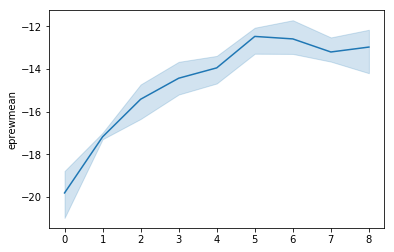

In [19]:
sns.lineplot(x=df.index, y=df.eprewmean, data=df)